___
# Predictive Modelling - Time Series Analysis

Using the Tableau SuperStore dataset 

Data
The Super Store dataset contains data on order details of customers for orders of a superstore in the US. This includes the state, region, order date, shipping date, product ordered etc.


___
# Literature on Forecasting


### Forecasting Truisms

- **Forecasts are always wrong**
- **Aggregated forecasts - This could be aggregating by SKU (Common parts) / by time (month better than days) / By Location**
- **Shorter horizon forecasts are more accurate (postponement)**

### Methods of forecasting

- Judgmental , Experimental , Causal (regression) , Time Series 

### Metrics for measuring forecasts

- Accuracy - Closeness to actual observations (MAD, MSE, RMSE, MAPE)
- Bias - Persistent tendency to over or under predict (actual-forecast)/actual+forecast)

___
# Forecasting Procedure

The below is the set procedure on model evaluation and application in time series

* Split Data into train and test set
* Choose a Model
* Fit model in training set
* Evaluate model on test set
* Re-fit model on entire data set
* Forecast for future data

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### The below are the algoritms used for demand planning in SAP's systems our notebook will be implementing as few of these algorithms (Time Series)

In [327]:
pd.read_csv('Data\Superstore\Models.csv')

,Statistical Algorithm,APO Demand Planning,IBP for Demand,This Notebook
0,Seasonal Linear Regression,Yes,No,No
1,Adaptive Response Rate Single Exponential Smoo...,No,Yes,No
2,Single Exponential Smoothing,Yes,Yes,Yes
3,Double Exponential Smoothing,Yes,Yes,Yes
4,Triple Exponential Smoothing,Yes,Yes,Yes
5,Automated Exponential Smoothing,Yes,Yes,No
6,Automated Exponential Smoothing [with paramete...,Yes,No,No
7,Croston Model,Yes,Yes,No
8,Simple Average,No,Yes,Yes
9,Simple Moving Average,Yes,Yes,Yes


### Read in data

In [328]:
data = pd.read_csv("Data\Superstore\superstore.csv", encoding= 'unicode_escape')

## EDA & Cleaning: Cleaning the categorical features

### The below look into the data show us that this is a sales dataset with the most granular level information - [Order, Customer, Product] level

In [329]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-13,12-11-13,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-13,12-11-13,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-13,17-06-13,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-12,18-10-12,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-12,18-10-12,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [331]:
# Converting the dates to date format
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [332]:
### The summary statistics of the measure variables suggest that the range of the prducts the profitability and the volume normally bought by the customers

In [333]:
data.drop(['Row ID','Postal Code'], axis=1).describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [334]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [335]:
data['Order Date'].describe()

count                    9994
unique                   1238
top       2013-06-09 00:00:00
freq                       38
first     2011-01-02 00:00:00
last      2014-12-31 00:00:00
Name: Order Date, dtype: object

In [336]:
data.sort_values(by=['Order Date'], inplace=True, ascending=True)
data.set_index(['Order Date'], drop=True, inplace=True)

In [337]:
data.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2011-01-02,3366,CA-2011-115161,2011-03-02,First Class,LC-17050,Liz Carlisle,Consumer,United States,Mission Viejo,California,92691,West,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196
2011-01-03,158,CA-2011-104269,2011-06-03,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,98115,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2,0.20,51.4764
2011-01-03,8310,CA-2011-168312,2011-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,United States,Houston,Texas,77036,Central,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,137.352,3,0.20,8.5845
2011-01-03,7950,CA-2011-131009,2011-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,63.552,6,0.60,-34.9536
2011-01-03,7948,CA-2011-131009,2011-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,United States,El Paso,Texas,79907,Central,OFF-FA-10004395,Office Supplies,Fasteners,Plymouth Boxed Rubber Bands by Plymouth,18.840,5,0.20,-3.5325


In [338]:
data.groupby('Category')[['Sales','Quantity']].sum()

,Sales,Quantity
Category,,
Furniture,741999.7953,8028
Office Supplies,719047.0320,22906
Technology,836154.0330,6939


## Understanding Forecasting Levels

Forecasting can be done at different levels of aggregations (Time) or different levels of hierarchy (Company level / region level / city level)

- Strategic 

    Horizon : Years
    
    Purposes : Capacity Planning, Business Planning 
    
    Superstore : Aggregate forecasting by category at a company level
    
    
- Tactical

    Horizon : Quarter
    
    Purposes : Sales Planning, Budgeting
    
    Superstore : Aggregate forecasting by category at a region level at a company level
    
    
- Operational 

    Horizon : Days
    
    Purposes : Production Planning, Transportation Planning
    
    Superstore : Aggregate forecasting by product at a region level at a company level

### For this exercise forecasting at a category level at a monthly frequency will be explored

In [339]:
Technology = pd.DataFrame(data[data['Category']=='Technology']['Sales'])
Technology = Technology.resample(rule='MS').sum()
Technology.sum()

Sales    836154.033
dtype: float64

### Plotting the sales of Technology products 

> A first look at the sales data shows a highly seasonal data with level (i.e a minimum sales) with no or very low trend.

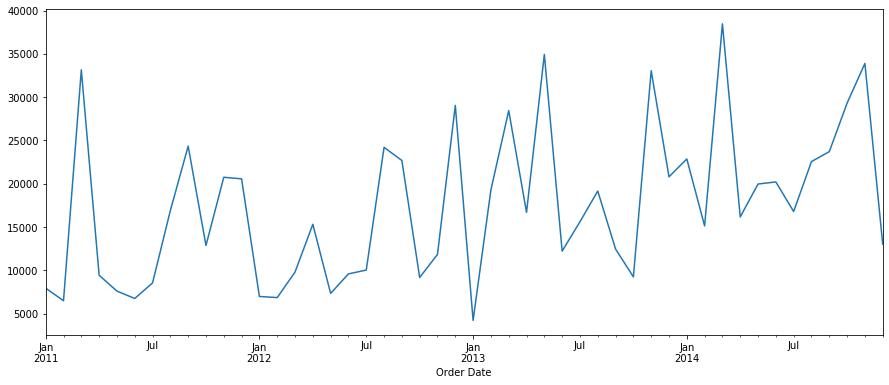

In [340]:
Technology['Sales'].plot(figsize=(15,6)).autoscale(axis='x', tight=True)

### In the next step we will decompose this dataset to find the various components of the sales data.

> The decomposition is used to split the sales data in to tend, seasonal and error components

In [341]:
from statsmodels.tsa.seasonal import seasonal_decompose

> Based on this chart, it looks like the trend in the later days (after Jul, 2012) is picking up at a linear rate especially hence the data in the later part is more important than the earlier

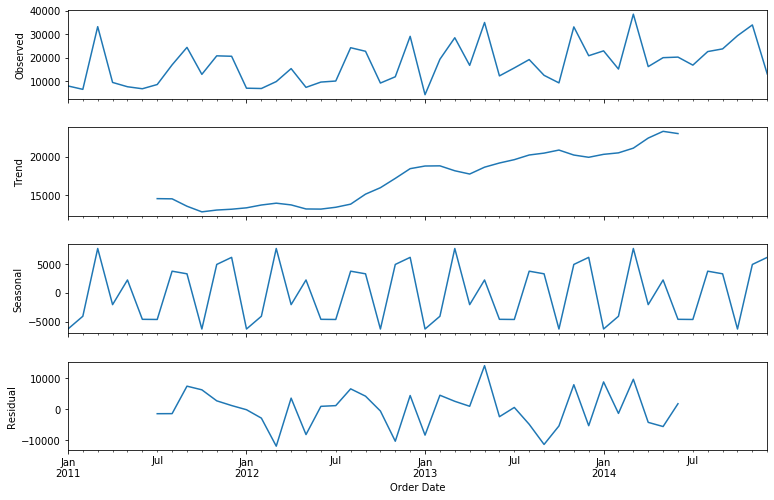

In [342]:
result = seasonal_decompose(Technology['Sales'], model='add')
fig = result.plot()   
fig.set_size_inches(12, 8)

## Step 1 : Split Data into train and test set

> 1. As we described earlier we will first split the data into Training and test set.
> 2. Training set is to build the model
> 3. Testing set is to check how effective the model is on unknow data

In [343]:
# We have 31 months of sales with us here we will split the data in 24 month for Training and 7 months for testing
Technology.shape

(48, 1)

In [344]:
Technology.index.max()

Timestamp('2014-12-01 00:00:00', freq='MS')

In [345]:
Technology.index.min()

Timestamp('2011-01-01 00:00:00', freq='MS')

In [346]:
Technology_Train = Technology[:'2013-12-01'].copy()
Technology_Test = Technology['2014-01-01':].copy()

In [347]:
Technology_Test.head()

,Sales
Order Date,
2014-01-01,22858.943
2014-02-01,15121.738
2014-03-01,38463.480
2014-04-01,16162.071
2014-05-01,19964.464


In [348]:
Technology_Train.tail()

,Sales
Order Date,
2013-08-01,19152.620
2013-09-01,12449.212
2013-10-01,9235.440
2013-11-01,33057.445
2013-12-01,20794.926


In [370]:
Technology_Test.shape

(12, 4)

___
# SMA
## Simple Moving Average : Plotting the Model

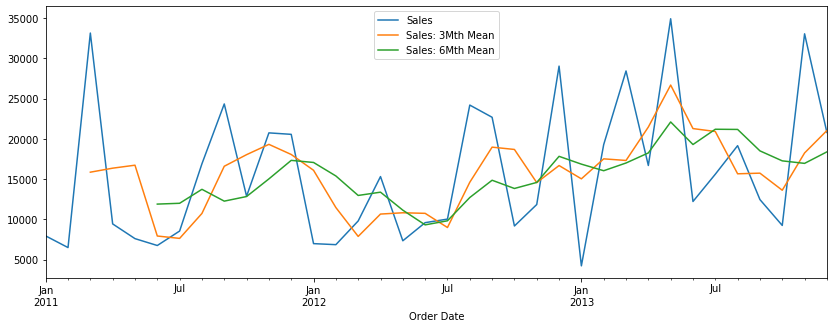

In [349]:
Technology_Train['Sales: 3Mth Mean'] = Technology_Train['Sales'].rolling(window=3).mean()
Technology_Train['Sales: 6Mth Mean'] = Technology_Train['Sales'].rolling(window=6).mean()
Technology_Train[['Sales','Sales: 3Mth Mean','Sales: 6Mth Mean']].plot(figsize=(14,5)).autoscale(axis='x',tight=True)

### Fitting and plotting the Simple moving average on test data.

In [350]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(Technology_Train['Sales'],order=(0,3))  
fitted = model.fit(disp=-1)  
fc, se, conf = fitted.forecast(len(Technology_Test['Sales']), alpha=0.05) 
Technology_Test['Sales: 3Mth Mean'] = pd.Series(fc, index=Technology_Test.index)
model = ARMA(Technology_Train['Sales'], order=(0, 6))  
fitted = model.fit(disp=-1)  
fc, se, conf = fitted.forecast(len(Technology_Test['Sales']), alpha=0.05) 
Technology_Test['Sales: 6Mth Mean'] = pd.Series(fc, index=Technology_Test.index)

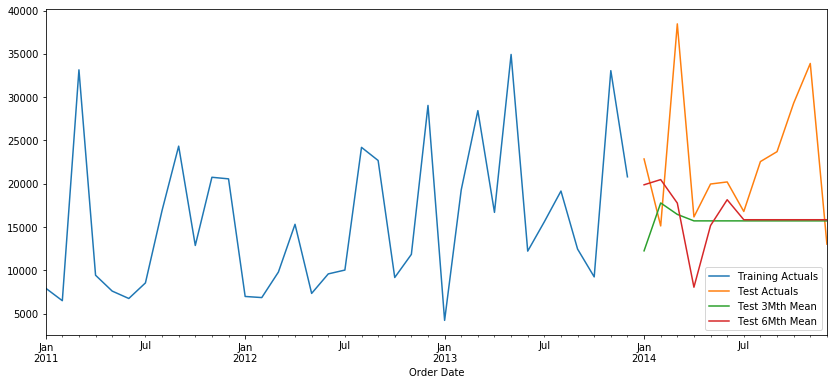

In [351]:
Technology_Train['Sales'].plot(legend=True,label='Training Actuals',figsize=(14,6))
Technology_Test['Sales'].plot(legend=True,label='Test Actuals')
Technology_Test['Sales: 3Mth Mean'].plot(legend=True,label='Test 3Mth Mean');
Technology_Test['Sales: 6Mth Mean'].plot(legend=True,label='Test 6Mth Mean');

### Evaluation Metrics

In [352]:
from sklearn import metrics

print('Mean Absolute Error : ', metrics.mean_absolute_error(Technology_Test['Sales'], Technology_Test['Sales: 3Mth Mean']))
print('Mean Squared Error : ', metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['Sales: 3Mth Mean']))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['Sales: 3Mth Mean'])))
print('Mean Absolute Percentage Error:', np.mean(np.abs((Technology_Test['Sales'] - Technology_Test['Sales: 3Mth Mean']) / Technology_Test['Sales'])) * 100, "%")

Mean Absolute Error :  7907.212967114397
Mean Squared Error :  106454121.64731352
Root Mean Squared Error :  10317.660667385486
Mean Absolute Percentage Error: 29.906162502573892 %


In [353]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Technology_Test['Sales'], Technology_Test['Sales: 6Mth Mean']))
print('Mean Squared Error : ', metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['Sales: 6Mth Mean']))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['Sales: 6Mth Mean'])))
print('Mean Absolute Percentage Error:', np.mean(np.abs((Technology_Test['Sales'] - Technology_Test['Sales: 6Mth Mean']) / Technology_Test['Sales'])) * 100, "%")

Mean Absolute Error :  7823.39392827406
Mean Squared Error :  98530599.69199987
Root Mean Squared Error :  9926.258091143907
Mean Absolute Percentage Error: 31.350735831582238 %


In [354]:
Technology_Test['Sales'].describe()

count       12.00000
mean     22669.43225
std       7751.30992
min      13018.56000
25%      16632.42525
50%      21379.64100
75%      25102.04050
max      38463.48000
Name: Sales, dtype: float64

___
# EWMA
## Exponentially Weighted Moving Average 

In [355]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [356]:
span = 3
alpha = 2/(span+1)
print('Span : {} | Alpha : {}'.format(span, alpha))

Span : 3 | Alpha : 0.5


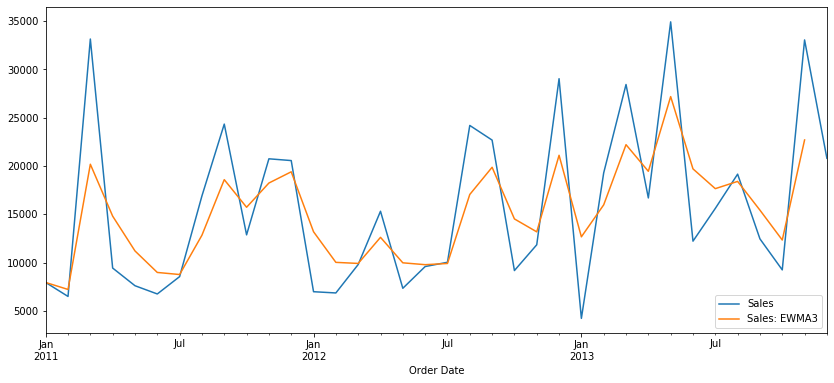

In [357]:
Technology_Train['Sales: EWMA3']=SimpleExpSmoothing(Technology_Train['Sales']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
Technology_Train[['Sales','Sales: EWMA3']].plot(figsize=(14,6)).autoscale(axis='x',tight=True);

In [358]:
ModelEWMA = SimpleExpSmoothing(Technology_Train['Sales']).fit(smoothing_level=alpha,optimized=False)
test_predictions = ModelEWMA.forecast(12).rename('HW Forecast')
Technology_Test['Sales: EWMA'] = pd.Series(test_predictions, index=Technology_Test.index)

In [362]:
Technology_Test

,Sales,Sales: 3Mth Mean,Sales: 6Mth Mean,Sales: EWMA
Order Date,,,,
2014-01-01,22858.943,12245.120137,19875.246205,21744.456178
2014-02-01,15121.738,17776.470170,20474.435255,21744.456178
2014-03-01,38463.480,16454.764086,17760.228538,21744.456178
2014-04-01,16162.071,15706.088763,8043.872321,21744.456178
2014-05-01,19964.464,15706.088763,15168.999432,21744.456178
2014-06-01,20203.436,15706.088763,18147.630639,21744.456178
2014-07-01,16789.210,15706.088763,15837.580495,21744.456178
2014-08-01,22555.846,15706.088763,15837.580495,21744.456178
2014-09-01,23701.051,15706.088763,15837.580495,21744.456178


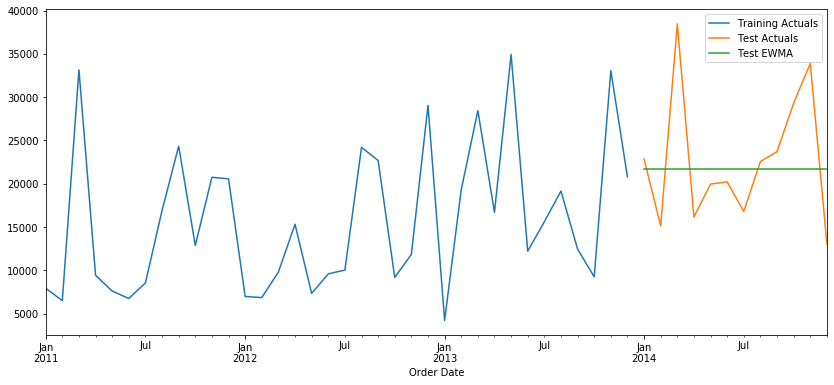

In [363]:
Technology_Train['Sales'].plot(legend=True,label='Training Actuals',figsize=(14,6))
Technology_Test['Sales'].plot(legend=True,label='Test Actuals')
Technology_Test['Sales: EWMA'].plot(legend=True,label='Test EWMA');

___
## Double Exponential Smoothing

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

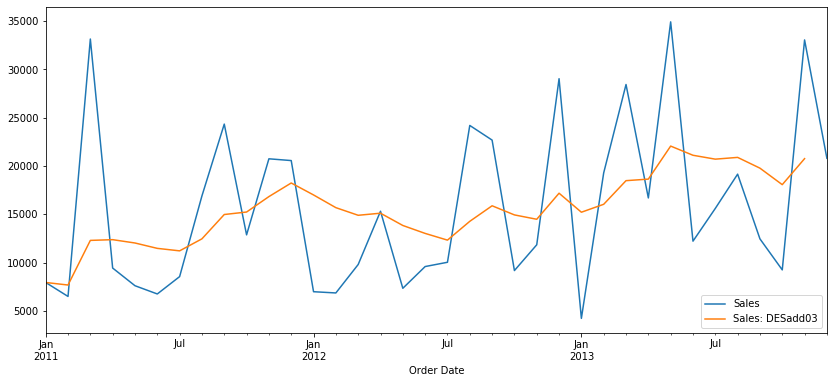

In [383]:
Technology_Train['Sales: DESadd03'] = ExponentialSmoothing(Technology_Train['Sales'], trend='add').fit().fittedvalues.shift(-1)
Technology_Train[['Sales','Sales: DESadd03']].plot(figsize=(14,6)).autoscale(axis='x',tight=True)

In [386]:
fitted_model = ExponentialSmoothing(Technology_Train['Sales'], trend='add').fit()
test_predictions = fitted_model.forecast(12).rename('H Forecast')

In [387]:
Technology_Test['DESadd03'] = test_predictions

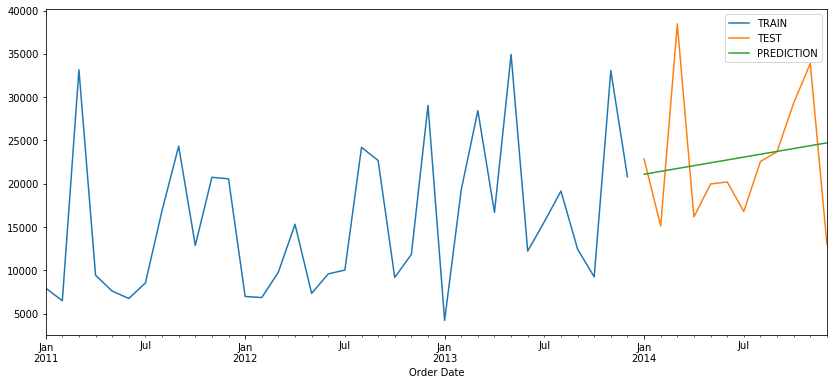

In [388]:
Technology_Train['Sales'].plot(legend=True,label='TRAIN')
Technology_Test['Sales'].plot(legend=True,label='TEST',figsize=(14,6));
Technology_Test['DESadd03'].plot(legend=True,label='PREDICTION');

In [389]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Technology_Test['Sales'], Technology_Test['DESadd03']))
print('Mean Squared Error : ', metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['DESadd03']))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['DESadd03'])))
print('Mean Absolute Percentage Error:', np.mean(np.abs((Technology_Test['Sales'] - Technology_Test['DESadd03']) / Technology_Test['Sales'])) * 100, "%")

Mean Absolute Error :  5773.928423805835
Mean Squared Error :  55365360.053464316
Root Mean Squared Error :  7440.79028420129
Mean Absolute Percentage Error: 27.61680876077126 %


___
## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 


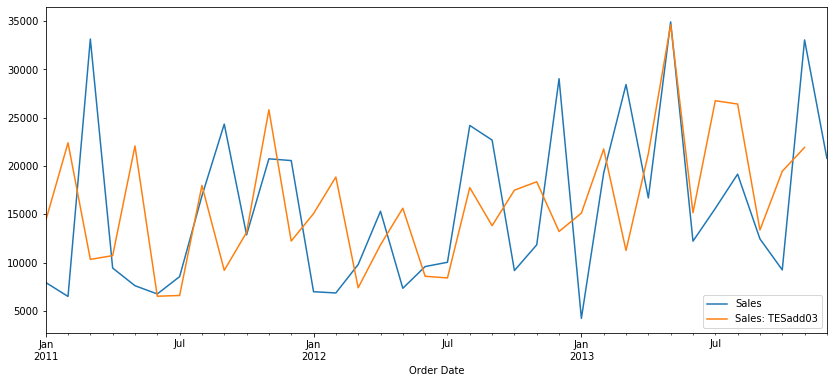

In [377]:
Technology_Train['Sales: TESadd03'] = ExponentialSmoothing(Technology_Train['Sales'], trend='add',seasonal='mul',seasonal_periods=3).fit().fittedvalues.shift(-1)
Technology_Train[['Sales','Sales: TESadd03']].plot(figsize=(14,6)).autoscale(axis='x',tight=True)

In [378]:
fitted_model = ExponentialSmoothing(Technology_Train['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12).rename('HW Forecast')

In [379]:
Technology_Test['TESadd03'] = test_predictions

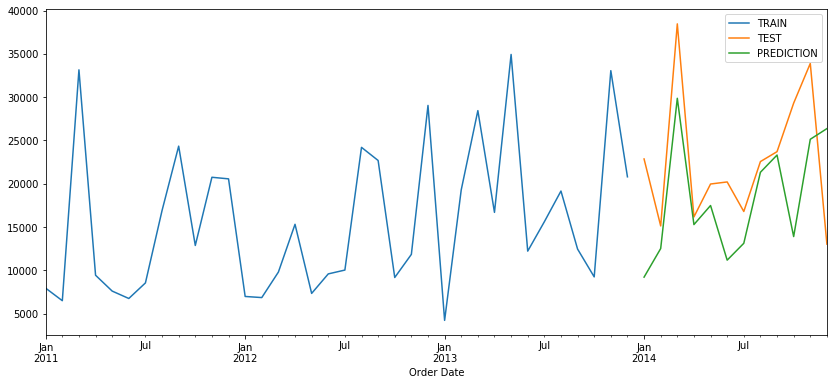

In [380]:
Technology_Train['Sales'].plot(legend=True,label='TRAIN')
Technology_Test['Sales'].plot(legend=True,label='TEST',figsize=(14,6));
Technology_Test['TESadd03'].plot(legend=True,label='PREDICTION');

In [381]:
print('Mean Absolute Error : ', metrics.mean_absolute_error(Technology_Test['Sales'], Technology_Test['TESadd03']))
print('Mean Squared Error : ', metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['TESadd03']))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Technology_Test['Sales'], Technology_Test['TESadd03'])))
print('Mean Absolute Percentage Error:', np.mean(np.abs((Technology_Test['Sales'] - Technology_Test['TESadd03']) / Technology_Test['Sales'])) * 100, "%")

Mean Absolute Error :  6673.041895007646
Mean Squared Error :  71928411.73085171
Root Mean Squared Error :  8481.061945938829
Mean Absolute Percentage Error: 30.992646898944937 %
